# Data prep

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt

# set style
import seaborn as sns

#set_theme() 
sns.set_theme(style="whitegrid",palette="PuOr_r")

In [2]:
df_m = pd.read_csv("data/merged_all.csv", dtype={"page_id":str, "ecco_id":str})
print(len(df_m), df_m["ecco_id"].nunique())

154422 4745


In [3]:
df_n = pd.read_csv("data/new_clip_classification.csv", dtype={"page_id":str, "ecco_id":str})
df_n=df_n.rename(columns={"Image": "page_allas_url", "Category":"cat","Score":"score"})
df_n.head()

,page_allas_url,cat,score
0,120040010108040_0.png,zoo_1,52.441406
1,042570140003550_0.png,mat_geo_astro,88.623047
2,027900080000910_0.png,mat_geo_astro,99.755859
3,108140010003130_1.png,mat_geo_astro,98.779297
4,014880210003390_1.png,mat_geo_astro,93.896484


In [4]:
df_n2 = pd.read_csv("data/new_clip_classifications_with_2nd_candidate.csv", dtype={"page_id":str, "ecco_id":str})
df_n2=df_n2.rename(columns={"Image": "page_allas_url", "Category":"cat","Score":"score"})
df_n2.head()

,page_allas_url,cat,score,Second_choice,2ndScore
0,120040010108040_0.png,animal,94.335938,anatomy,1.838684
1,042570140003550_0.png,mat_geo_astro,89.453125,architecture,7.116699
2,027900080000910_0.png,mat_geo_astro,99.853516,architecture,0.066614
3,108140010003130_1.png,mat_geo_astro,98.730469,sea,1.097107
4,014880210003390_1.png,mat_geo_astro,96.289062,misc,2.030945


In [5]:
# merge
df_m2=df_m.merge(df_n, on="page_allas_url", suffixes=["","_2"])
df_f=df_m2.merge(df_n2, on="page_allas_url", suffixes=["","_3"])
print(len(df_m) , len(df_f))

154422 154422


In [6]:
df_f.head()

,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,authors,category_clip,score_clip,category_em,cat,score,cat_3,score_3,Second_choice,2ndScore
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,"Bell, Benjamin, 1749-1806.",mechanical,99.316406,Mechanical-Tools,mechnanical_tools,73.876953,mechanical_tools,99.804688,anatomy,0.075436
1,000170010400180_1.png,000170010400180_1,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_1...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,"Bell, Benjamin, 1749-1806.",other,28.491211,Botanical,agri_garden,42.651367,architecture,43.164062,botanical,41.186523
2,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,"Bell, Benjamin, 1749-1806.",mechanical,98.486328,Mechanical-Tools,mechnanical_tools,89.697266,mechanical_tools,95.410156,architecture,2.880859
3,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,"Bell, Benjamin, 1749-1806.",mechanical,91.308594,Mechanical-Tools,agri_garden,48.413086,mechanical_tools,75.390625,animal,11.029053
4,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,"Bell, Benjamin, 1749-1806.",other,47.436523,Mechanical-Tools,architecture,96.435547,architecture,96.093750,animal,1.370239


## viz

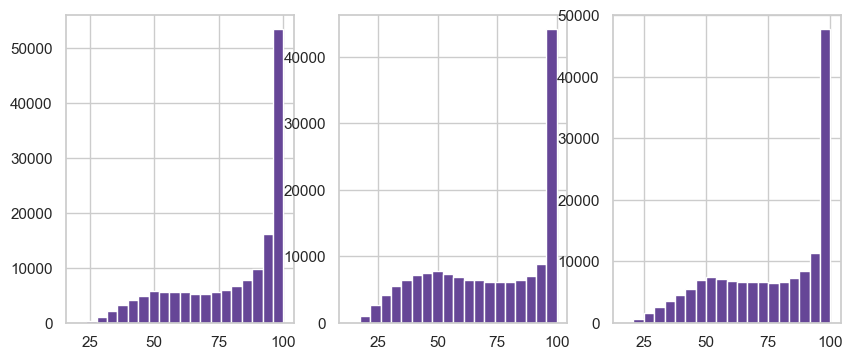

In [7]:
# histograms
fig, axs = plt.subplots(1,3, figsize=(10,4))
axs0=df_m["score_clip"].hist(bins=20, ax=axs[0])
axs1=df_n["score"].hist(bins=20, ax=axs[1])
axs2=df_n2["score"].hist(bins=20, ax=axs[2])

In [8]:
df_f[df_f["cat_3"]=="botanical"][["allas_page_url","score_3","category_em"]].sample(10)

,allas_page_url,score_3,category_em
63503,https://a3s.fi/dhh23-em-pages/052080010801010.png,72.558594,Botanical
115831,https://a3s.fi/dhh23-em-pages/097230011801300.png,92.773438,Botanical
55934,https://a3s.fi/dhh23-em-pages/046180030004770.png,60.058594,Botanical
64579,https://a3s.fi/dhh23-em-pages/053840010004290.png,79.443359,Botanical
49258,https://a3s.fi/dhh23-em-pages/039500011600210.png,80.126953,Botanical
61404,https://a3s.fi/dhh23-em-pages/051720010309530.png,60.156250,Botanical
153236,https://a3s.fi/dhh23-em-pages/129480010100770.png,81.933594,Botanical
75925,https://a3s.fi/dhh23-em-pages/061920080104810.png,51.074219,Botanical
50912,https://a3s.fi/dhh23-em-pages/039510013001390.png,32.275391,Botanical
120272,https://a3s.fi/dhh23-em-pages/099330012000920.png,71.484375,Botanical


In [9]:
# check some scores
df_f[(df_f["score_3"]>30)&(df_f["score_3"]<60)][["cat_3","cat","allas_page_url","score_3","category_em"]].sample(10)

,cat_3,cat,allas_page_url,score_3,category_em
28251,botanical,botanical,https://a3s.fi/dhh23-em-pages/021950020103780.png,55.175781,Botanical
101506,animal,mechnanical_tools,https://a3s.fi/dhh23-em-pages/080810020004570.png,41.015625,Mechanical-Tools
133943,mat_geo_astro,mat_geo_astro,https://a3s.fi/dhh23-em-pages/114740080000140.png,51.416016,Other
73924,mat_geo_astro,mat_geo_astro,https://a3s.fi/dhh23-em-pages/060140020200900.png,55.126953,Math-Astro
43874,architecture,architecture,https://a3s.fi/dhh23-em-pages/035010100000430.png,44.458008,Mechanical-Tools
30838,mechanical_tools,mechnanical_tools,https://a3s.fi/dhh23-em-pages/022840030001630.png,40.429688,Other
59927,mechanical_tools,agri_garden,https://a3s.fi/dhh23-em-pages/049240030201750.png,42.724609,Mechanical-Tools
19620,animal,agri_garden,https://a3s.fi/dhh23-em-pages/016760040003030.png,46.386719,Mechanical-Tools
96125,architecture,architecture,https://a3s.fi/dhh23-em-pages/076250030000500.png,54.492188,Math-Astro
59502,architecture,architecture,https://a3s.fi/dhh23-em-pages/049030010308540.png,40.771484,Other


microbio 70.8984375


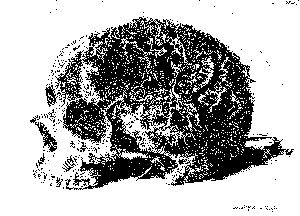

microbio 61.181640625


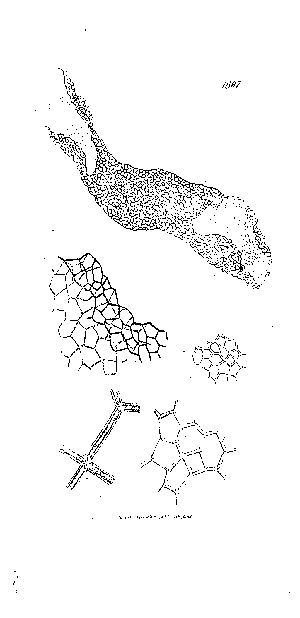

microbio 57.91015625


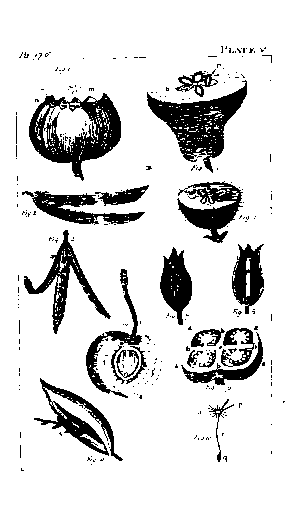

microbio 58.447265625


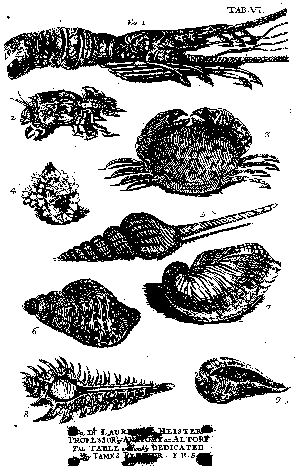

microbio 51.513671875


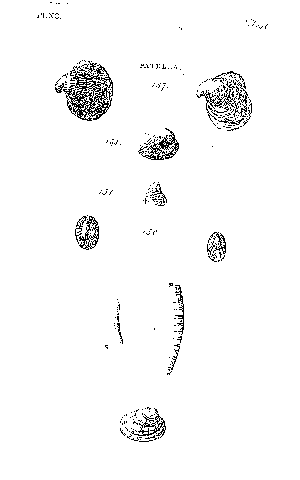

microbio 70.01953125


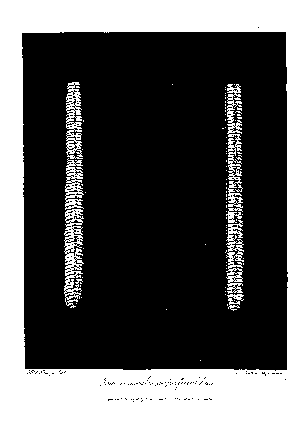

microbio 65.576171875


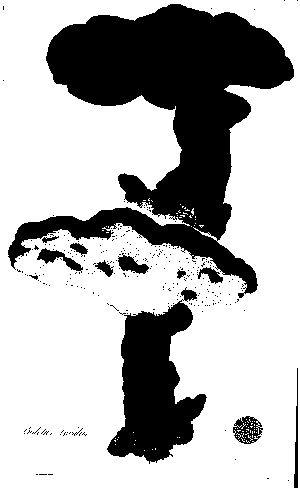

microbio 85.3515625


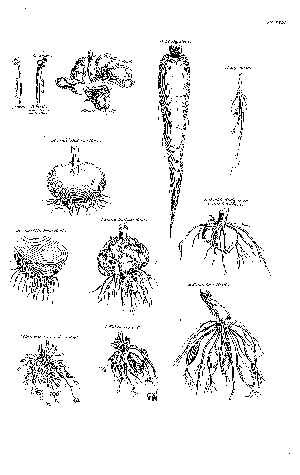

microbio 62.01171875


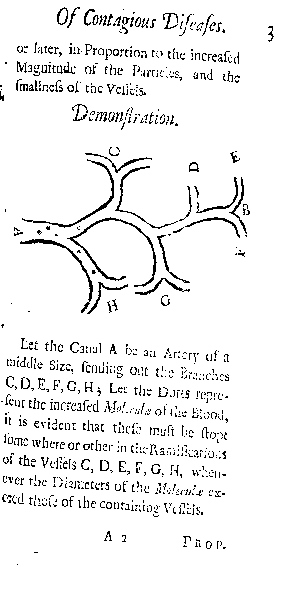

microbio 54.150390625


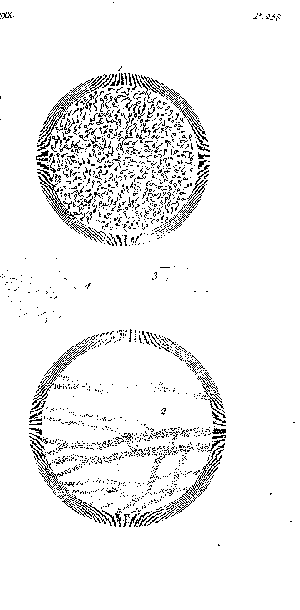

In [251]:
import requests
from PIL import Image
import io

for image,r in df_f[(df_f["score_3"]>50)&(df_f["score_3"]<100)&(df_f["cat_3"]=="microbio")][["cat_3","cat","allas_page_url","score_3","category_em"]].sample(10).iterrows():
    # URL of the image
    image_url = r["allas_page_url"]
    print(r["cat_3"], r["score_3"])
    # Send a GET request to the image URL
    response = requests.get(image_url)

    # Read the image data from the response
    image_data = response.content

    # Create a PIL image object from the image data
    image = Image.open(io.BytesIO(image_data))

    # Display the image in the notebook output
    #image.show()
    #display(image)
    # Resize the image
    new_width = 300  # Set the desired width
    new_height = int(image.size[1] * (new_width / image.size[0]))  # Maintain the aspect ratio
    resized_image = image.resize((new_width, new_height))

    # Display the resized image in the notebook output
    display(resized_image)


## analysis

['mechanical_tools' 'architecture' 'misc' 'animal' 'botanical'
 'mat_geo_astro' 'microbio' 'anatomy' 'sea' 'cooking'] 129083


Index(['page_allas_url', 'illustration_id', 'page_id',
       'illustration_allas_url', 'ecco_id', 'page_number', 'allas_page_url',
       'caption_texts', 'estc_id', 'ecco_full_title', 'number_of_pages',
       'language_primary', 'gatherings', 'publication_year',
       'publication_decade', 'work_id', 'publication_place',
       'publication_country', 'document_type', 'sub_category', 'authors',
       'category_clip', 'score_clip', 'category_em', 'cat', 'score', 'cat_3',
       'score_3', 'Second_choice', '2ndScore'],
      dtype='object')

In [262]:

## cut at 50
sub= df_f[(df_f["score_3"]>50)]
print(sub.cat_3.unique(), len(sub))
sub.columns
# final categories
sub["c"] = sub["cat_3"]
r_dict= {"microbio":"biology","animal":"biology","botanical":"biology","mechanical_tools":"practical","architecture":"misc","cooking":"misc" ,"sea":"misc","mat_geo_astro":"math_astro"}
r_dict= {"microbio":"biology","mechanical_tools":"practical","architecture":"misc","cooking":"misc" ,"sea":"misc","mat_geo_astro":"math_astro"}

sub["c"]=sub["c"].replace(r_dict)

['mechanical_tools' 'architecture' 'misc' 'animal' 'botanical'
 'mat_geo_astro' 'microbio' 'anatomy' 'sea' 'cooking'] 129083


C:\Users\telmi\AppData\Local\Temp\ipykernel_16372\3475148351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["c"] = sub["cat_3"]
C:\Users\telmi\AppData\Local\Temp\ipykernel_16372\3475148351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["c"]=sub["c"].replace(r_dict)


In [263]:
img_coocc = sub.groupby(by=['ecco_id', 'c'])[['illustration_id']].size().reset_index(name='img_count')
img_coocc = img_coocc.pivot(index=['ecco_id'],columns=['c'], values = 'img_count')

In [264]:
img_coocc = img_coocc.fillna(0)
n_img = img_coocc
n_img= n_img.apply(lambda x: sum(x), axis=1).reset_index(name="total")

ecco_df=n_img.merge(img_coocc.reset_index(), on="ecco_id")

In [265]:
#img_coocc
img_coocc.head()

c,anatomy,animal,biology,botanical,math_astro,misc,practical
ecco_id,,,,,,,
0001700104,0.0,5.0,0.0,2.0,1.0,10.0,23.0
0001700201,0.0,2.0,0.0,0.0,0.0,4.0,8.0
0001700202,0.0,1.0,0.0,0.0,0.0,4.0,10.0
0001700203,0.0,1.0,0.0,0.0,0.0,2.0,11.0
0001700205,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [266]:
sub=sub.merge(ecco_df, on="ecco_id").drop_duplicates()

In [267]:
sub.head()

,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,2ndScore,c,total,anatomy,animal,biology,botanical,math_astro,misc,practical
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.075436,practical,41.0,0.0,5.0,0.0,2.0,1.0,10.0,23.0
1,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,2.880859,practical,41.0,0.0,5.0,0.0,2.0,1.0,10.0,23.0
2,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,11.029053,practical,41.0,0.0,5.0,0.0,2.0,1.0,10.0,23.0
3,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,1.370239,misc,41.0,0.0,5.0,0.0,2.0,1.0,10.0,23.0
4,000170010400500_2.png,000170010400500_2,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_2...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,2.638245,misc,41.0,0.0,5.0,0.0,2.0,1.0,10.0,23.0


In [268]:
# add relative column
threshold = 0.05
i_list=[]
for c in ["anatomy","biology","math_astro","misc","practical","botanical","animal"]:
    c_rel= c+"_rel"
    sub[c_rel] = sub[c]/ sub["total"]
    sub.loc[sub[c_rel] <= threshold, c] = 0
    sub.loc[sub[c_rel] > threshold, c] = 1

    #filtered_rows = sub[(sub[sub[c]] == 1.0) &(sub[sub["c"]] == c)]
    filtered_rows =  sub[(sub[c] == 1)&(sub["c"]==c)]
    ixlist=filtered_rows.index.tolist()
    i_list= i_list+ixlist
    
#new_df=pd.DataFrame()
# create a new df where 

mylist=list(set(i_list))#.sort()
#sub
#for col in img_coocc.columns:
#        img_coocc.loc[img_coocc[col] <= threshold, col] = 0
#        img_coocc.loc[img_coocc[col] > threshold, col] = 1

In [269]:
mylist[:5]

[0, 1, 2, 3, 4]

In [270]:
#filtered_rows =  sub[(sub["biology"] == 1)&(sub["c"]=="biology")]
mylist#.sort()
final = sub[sub.index.isin(mylist)]
print(len(final), len(sub))

126601 129042


In [ ]:
# pipeline for categories over time

#for c in sub["c"].unique():
#    grouped_df= sub.groupby("ecco_id") 

In [226]:
#sub.groupby("ecco_id")
#sub.loc[img_coocc[col] <= threshold, col] = 0
# pairwise co-occurence variables to dummy

#    img_coocc = img_coocc.fillna(0)
#    n_img = img_coocc
#    n_img= n_img.apply(lambda x: sum(x), axis=1)

#    for col in img_coocc.columns:
#        img_coocc[col] = img_coocc[col].div(n_img)
    
 #   for col in img_coocc.columns:
#        img_coocc.loc[img_coocc[col] <= threshold, col] = 0
#        img_coocc.loc[img_coocc[col] > threshold, col] = 1

In [271]:
# categories over time
sub2=sub # make a copy
sub=final
dec_sum= sub.groupby(["publication_decade","c"])["page_id"].nunique().reset_index()
dec_sum_format= sub.groupby(["publication_decade","c","gatherings"])["page_id"].nunique().reset_index()

In [244]:
#sub

,page_allas_url,illustration_id,page_id,illustration_allas_url,ecco_id,page_number,allas_page_url,caption_texts,estc_id,ecco_full_title,...,botanical,math_astro,misc,practical,anatomy_rel,biology_rel,math_astro_rel,misc_rel,practical_rel,botanical_rel
0,000170010400180_0.png,000170010400180_0,000170010400180,https://a3s.fi/dhh23-em-illu/000170010400180_0...,0001700104,18.0,https://a3s.fi/dhh23-em-pages/000170010400180.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.0,0.0,1.0,1.0,0.0,0.121951,0.024390,0.243902,0.560976,0.04878
1,000170010400370_0.png,000170010400370_0,000170010400370,https://a3s.fi/dhh23-em-illu/000170010400370_0...,0001700104,37.0,https://a3s.fi/dhh23-em-pages/000170010400370.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.0,0.0,1.0,1.0,0.0,0.121951,0.024390,0.243902,0.560976,0.04878
2,000170010400500_0.png,000170010400500_0,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_0...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.0,0.0,1.0,1.0,0.0,0.121951,0.024390,0.243902,0.560976,0.04878
3,000170010400500_1.png,000170010400500_1,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_1...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.0,0.0,1.0,1.0,0.0,0.121951,0.024390,0.243902,0.560976,0.04878
4,000170010400500_2.png,000170010400500_2,000170010400500,https://a3s.fi/dhh23-em-illu/000170010400500_2...,0001700104,50.0,https://a3s.fi/dhh23-em-pages/000170010400500.png,NaN,T127210,"A system of surgery. By Benjamin Bell, Member ...",...,0.0,0.0,1.0,1.0,0.0,0.121951,0.024390,0.243902,0.560976,0.04878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129036,129490010203660_0.png,129490010203660_0,129490010203660,https://a3s.fi/dhh23-em-illu/129490010203660_0...,1294900102,366.0,https://a3s.fi/dhh23-em-pages/129490010203660.png,NaN,N50716,The elements of navigation; containing the the...,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.951613,0.048387,0.000000,0.00000
129037,129490010203670_0.png,129490010203670_0,129490010203670,https://a3s.fi/dhh23-em-illu/129490010203670_0...,1294900102,367.0,https://a3s.fi/dhh23-em-pages/129490010203670.png,NaN,N50716,The elements of navigation; containing the the...,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.951613,0.048387,0.000000,0.00000
129038,129490010203680_0.png,129490010203680_0,129490010203680,https://a3s.fi/dhh23-em-illu/129490010203680_0...,1294900102,368.0,https://a3s.fi/dhh23-em-pages/129490010203680.png,NaN,N50716,The elements of navigation; containing the the...,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.951613,0.048387,0.000000,0.00000
129040,129500090000530_0.png,129500090000530_0,129500090000530,https://a3s.fi/dhh23-em-illu/129500090000530_0...,1295000900,53.0,https://a3s.fi/dhh23-em-pages/129500090000530.png,NaN,T232400,Of the mechanism of the motions of floating bo...,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.00000


In [272]:
categories=list(dec_sum_format["gatherings"].unique())

palet=sns.color_palette("tab10", len( dec_sum_format["c"].unique()))
palet
palet_dict= {g:c for g,c in zip(dec_sum_format["c"].unique(),palet)}



dec_sum_format

,publication_decade,c,gatherings,page_id
0,1680.0,animal,2fo,3
1,1680.0,botanical,2fo,8
2,1690.0,animal,8vo,4
3,1690.0,misc,2fo,1
4,1690.0,misc,8vo,15
...,...,...,...,...
337,1800.0,misc,8vo,258
338,1800.0,practical,12mo,6
339,1800.0,practical,2fo,1
340,1800.0,practical,4to,38


In [273]:
dec_sum_format["c"].map(palet_dict)
dec_sum_format['color_column'] = dec_sum_format['c'].map(palet_dict)

Text(0.5, 1.0, 'Nr of pictures per publication')

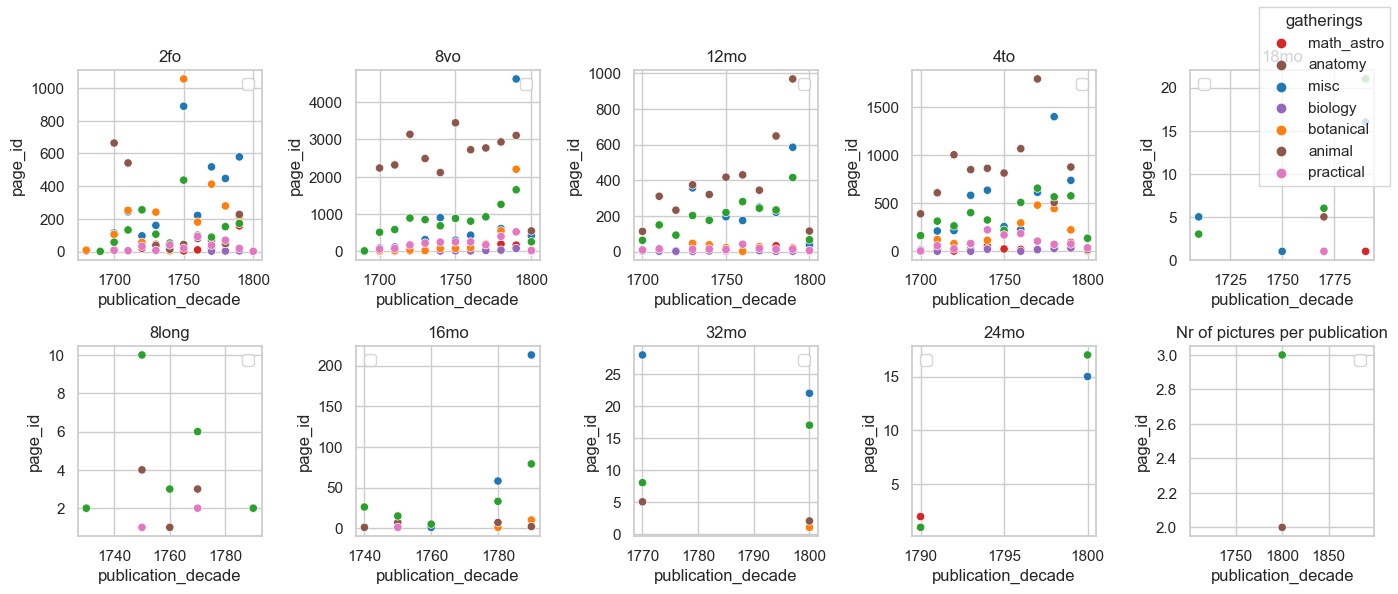

In [274]:
plotdata=dec_sum_format

fig, axes= plt.subplots(2,5,figsize=(14,6))

# Loop through the axes
n=0
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        # Get the current category
        category = categories[i*5 + j]
        
        # Create a subset of the DataFrame based on the category
        subset_df = dec_sum_format[dec_sum_format['gatherings'] == category]  # Example subset creation (modify as per your requirements)

        # Perform operations on the subset_df and ax
        plot=sns.scatterplot(data=subset_df, x='publication_decade', y='page_id',hue="c", ax=ax, palette=palet_dict) 
        plot.legend("")
        ax.set_title(category)

# Get the handles and labels from the last subplot
handles, labels = axes[-1][-1].get_legend_handles_labels()
handles2,labels2 = axes[0][0].get_legend_handles_labels()
all_handles= list(set(handles+handles2))
all_labels= list(set(labels+labels2))
# Create a single legend for all subplots
fig.legend(all_handles, all_labels, loc='upper right', title="gatherings", ncol=1, fancybox=False, shadow=False)

# Adjust the spacing between subplots and legend
fig.tight_layout(rect=[0, 0, 1, 0.95])

ax.set_title("Nr of pictures per publication")
#fig.tight_layout()

In [275]:
# subsets for folios and octavos
folio=sub[sub["gatherings"]=="2fo"]
folio_dec=folio.groupby(["publication_decade","c"])["ecco_id"].nunique().reset_index()
octavo=sub[sub["gatherings"]=="8vo"]
oct_dec=octavo.groupby(["publication_decade","c"])["ecco_id"].nunique().reset_index()
folio_dec



,publication_decade,c,ecco_id
0,1680.0,animal,1
1,1680.0,botanical,1
2,1690.0,misc,1
3,1700.0,anatomy,3
4,1700.0,animal,6
...,...,...,...
65,1790.0,misc,14
66,1790.0,practical,2
67,1800.0,animal,1
68,1800.0,misc,1


In [276]:
# total nr of publications per decade
folio_dec["total"] = folio_dec['ecco_id'].groupby(folio_dec['publication_decade']).transform('sum')
folio_dec["relative"] = folio_dec["ecco_id"] /folio_dec["total"] 
display(folio_dec.head() )

#same for 
oct_dec["total"] = oct_dec['ecco_id'].groupby(oct_dec['publication_decade']).transform('sum')
oct_dec["relative"] = oct_dec["ecco_id"] /oct_dec["total"] 

,publication_decade,c,ecco_id,total,relative
0,1680.0,animal,1,2,0.500000
1,1680.0,botanical,1,2,0.500000
2,1690.0,misc,1,1,1.000000
3,1700.0,anatomy,3,27,0.111111
4,1700.0,animal,6,27,0.222222


In [278]:
# Reshape the DataFrame using pivot
reshaped_df = folio_dec[(folio_dec["publication_decade"]<1800)&(folio_dec["publication_decade"]>1690)].sort_values(by=["publication_decade","c"]).pivot(index='publication_decade', columns='c', values='relative')
reshaped_oct = oct_dec[(oct_dec["publication_decade"]<1800)&(oct_dec["publication_decade"]>1690)].sort_values(by=["publication_decade","c"]).pivot(index='publication_decade', columns='c', values='relative')



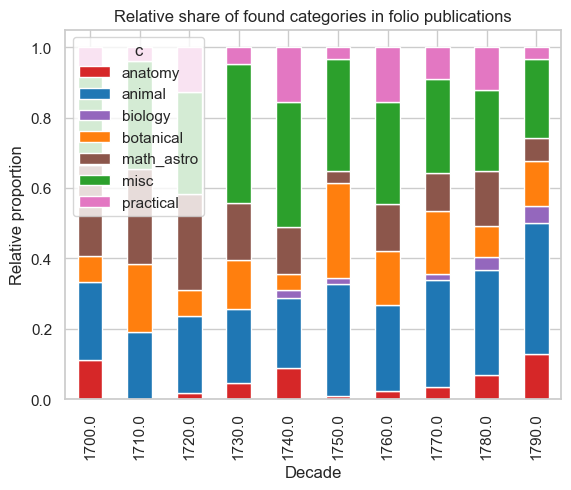

In [279]:
reshaped_df.plot(kind='bar', stacked=True, color=palet_dict)
plt.xlabel('Decade')
plt.ylabel('Relative proportion')
plt.title('Relative share of found categories in folio publications')
plt.show()

In [282]:
# change the order
reshaped_df2 =reshaped_df[["misc","math_astro","practical","anatomy","biology","botanical","animal"]]
reshaped_oct2=reshaped_oct[["misc","math_astro","practical","anatomy","biology","botanical","animal"]]

In [294]:
# new palet

palet_other= sns.color_palette("coolwarm", 8)
palet_other 

[(0.3634607953411765, 0.4847836818509804, 0.9010188868941177),
 (0.5108243242509803, 0.6493966148235294, 0.9850787763764707),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.8049647588235295, 0.8516661605568627, 0.9261650744313725),
 (0.9193759889058823, 0.8312727235294118, 0.7828736304470588),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9440545734235294, 0.5531534787490197, 0.4355484903137255),
 (0.8523781350078431, 0.34649194649411763, 0.2803464686980392)]

In [307]:
palet_other2=sns.color_palette("Spectral", 10)
palet_other2

[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

In [288]:
palet_bio= sns.color_palette("viridis", 6)
palet_bio

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [342]:
palet_other= sns.color_palette("coolwarm", 8)
palet_other2=sns.color_palette("Spectral", 10)

palet_bio= sns.color_palette("viridis", 6)

palet= {"botanical":palet_bio[5], "biology":palet_bio[4], "zoological":palet_bio[2],"anatomy":palet_other2[4], "practical":palet_other2[1],
        "misc":"grey", "math_astro":palet_other2[0]}

In [344]:
# rename animal to zoological
reshaped_df2=reshaped_df2.rename(columns={"animal":"zoological"})
reshaped_oct2=reshaped_oct2.rename(columns={"animal":"zoological"})

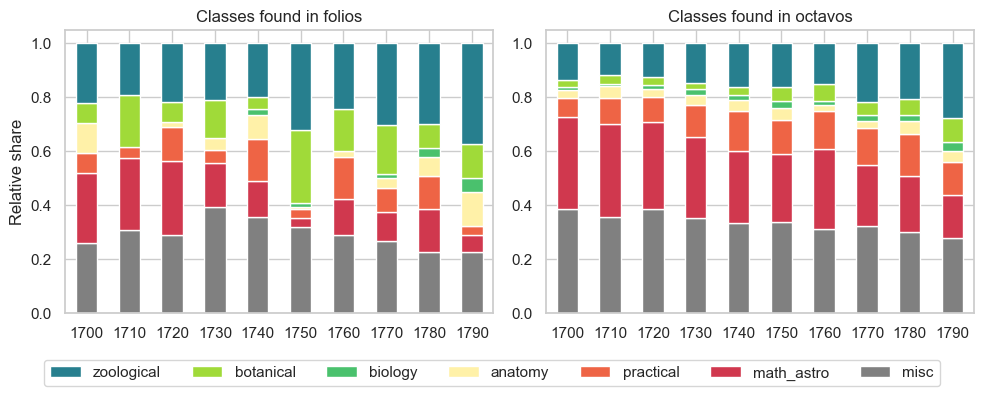

In [363]:
fig, axes= plt.subplots(1,2,figsize=(10,4))

# generate a stacked bar plot
reshaped_df2.plot(kind='bar', stacked=True, color=palet, ax=axes[0])

# labels for x & y axis
axes[0].set_xlabel('')
axes[0].set_ylabel('Relative share')
h,l=axes[0].get_legend_handles_labels()
reversed_l =l[::-1]
reversed_h =h[::-1]

# title of plot
axes[0].set_title('Classes found in folios')

custom_labels=[1700,1710,1720,1730,1740,1750,1760,1770,1780,1790]
#plt.gca().set_xticklabels(custom_labels)
reshaped_oct2.plot(kind='bar', stacked=True, color=palet, ax=axes[1])

# labels for x & y axis
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].legend("",loc="upper left", frameon=False)
axes[0].legend("",loc="upper left", frameon=False)

axes[0].set_xticklabels(custom_labels,rotation=0)

# title of plot
axes[1].set_title('Classes found in octavos')

fig.tight_layout()


plt.gca().set_xticklabels(custom_labels,rotation=0)

#legend to the bottom
fig.legend(labels=reversed_l,handles=reversed_h,loc='lower center', frameon=True, ncol=7)

#fig.savefig("output/category_format_legbot.png")

Text(0.5, 1.0, 'classes in folios')

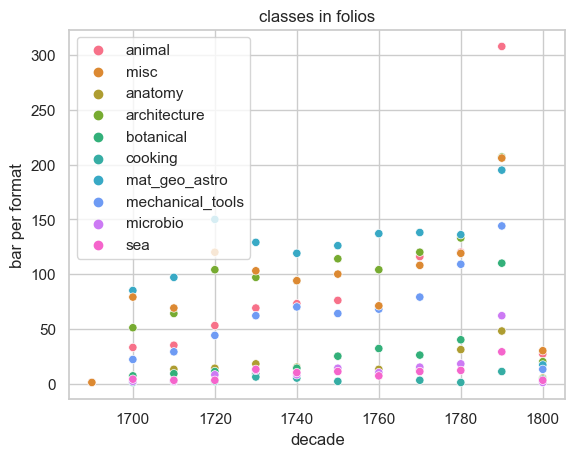

In [19]:
sns.scatterplot(data=oct_dec,x="publication_decade",y="ecco_id", hue="cat_3")
 
# labels for x & y axis
plt.xlabel('decade')
plt.ylabel('bar per format')
plt.legend(loc="upper left")
# title of plot
plt.title('classes in folios')